In [1]:
import datetime, time
import simpy

import shapely.geometry

import pandas as pd
import openclsim.core as core
import openclsim.model as model
import openclsim.plot as plot

# setup environment
simulation_start = 0
my_env = simpy.Environment(initial_time=simulation_start)
registry = {}
keep_resources = {}

In [2]:
Site = type(
    "Site",
    (
        core.Identifiable,
        core.Log,
        core.Locatable,
        core.HasContainer,
        core.HasResource,
    ),
    {},
)

TransportProcessingResource = type(
    "TransportProcessingResource",
    (
        core.Identifiable,
        core.Log,
        core.ContainerDependentMovable,
        core.Processor,
        core.LoadingFunction,
        core.UnloadingFunction,
        core.HasResource,
    ),
    {},
)
location_from_site = shapely.geometry.Point(4.18055556, 52.18664444)
location_to_site = shapely.geometry.Point(4.25222222, 52.11428333)

In [3]:
from_site = Site(
    env=my_env,
    name="Winlocatie",
    geometry=location_from_site,
    capacity=10_000,
    level=10_000,
)

to_site = Site(
    env=my_env,
    name="Dumplocatie",
    geometry=location_to_site,
    capacity=10_000,
    level=0,
)

In [4]:
hopper = TransportProcessingResource(
    env=my_env,
    name="Hopper 01",
    geometry=location_from_site,
    capacity=1000,
    compute_v=lambda x: 10 + 2 * x,
    loading_rate=1,
    unloading_rate=5,
)

In [5]:
single_run, while_activity  = model.single_run_process(
    name="single_run",
    registry={},
    env=my_env,
    origin=from_site,
    destination=to_site,
    mover=hopper,
    loader=hopper,
    unloader=hopper
)

In [9]:
model.register_processes([while_activity])
my_env.run()

In [10]:
display(plot.get_log_dataframe(hopper, [*single_run, while_activity]))

,Activity,Timestamp,ActivityState,geometry,container level
0,single_run sailing empty,1970-01-01 00:00:00.000000,START,POINT (4.18055556 52.18664444),0.0
1,single_run sailing empty,1970-01-01 00:00:00.000000,STOP,POINT (4.18055556 52.18664444),0.0
2,single_run loading,1970-01-01 00:00:00.000000,START,POINT (4.18055556 52.18664444),0.0
3,single_run loading,1970-01-01 00:00:00.000000,START,POINT (4.18055556 52.18664444),0.0
4,single_run loading,1970-01-01 00:16:40.000000,STOP,POINT (4.18055556 52.18664444),1000.0
...,...,...,...,...,...
115,single_run sailing filled,1970-01-01 07:49:02.292915,STOP,POINT (4.25222222 52.11428333),1000.0
116,single_run unloading,1970-01-01 07:49:02.292915,START,POINT (4.25222222 52.11428333),1000.0
117,single_run unloading,1970-01-01 07:49:02.292915,START,POINT (4.25222222 52.11428333),0.0
118,single_run unloading,1970-01-01 07:52:22.292915,STOP,POINT (4.25222222 52.11428333),0.0


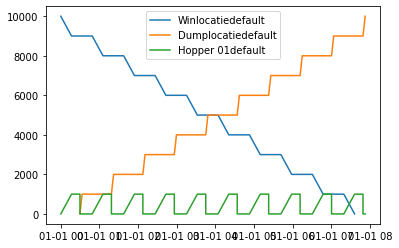

In [11]:
fig = plot.get_step_chart([from_site, to_site, hopper])